In [1]:
require 'Utils'
require 'Net1'
require 'VGG'

In [2]:
file_list = get_file_names();

In [3]:
print(#file_list)

10000	


In [4]:
im_batch = get_image_batch(5)

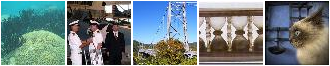

In [5]:
itorch.image(im_batch)


In [6]:
uv_images,y_images = create_yuv_images(im_batch,28,28)
print(uv_images:size())

  5
  2
 28
 28
[torch.LongStorage of size 4]



In [7]:
itorch.image(torch.cat(y_images,uv_images,2))

In [8]:
itorch.image(image.yuv2rgb(torch.cat(y_images[5],uv_images[5],1)))

In [9]:
require 'VGG';
require 'nn';
VGG_net = load_VGG();

Successfully loaded ../../Data/VGG_caffe/VGG_ILSVRC_16_layers.caffemodel


conv1_1: 64 3 3 3
conv1_2: 64 64 3 3
conv2_1: 128 64 3 3
conv2_2: 128 128 3 3


conv3_1: 256 128 3 3
conv3_2: 256 256 3 3


conv3_3: 256 256 3 3


conv4_1: 512 256 3 3


conv4_2: 512 512 3 3


conv4_3: 512 512 3 3


conv5_1: 512 512 3 3


conv5_2: 512 512 3 3


conv5_3: 512 512 3 3


fc6: 1 1 25088 4096


fc7: 1 1 4096 4096


fc8: 1 1 4096 1000


In [10]:
-- Defining a loss function
Weight = torch.ones(2,28,28)-- All ones matrix -- Bad coding
criterion = nn.WeightedMSECriterion(Weight)
print('MSEcriterion defined')

MSEcriterion defined	


In [11]:
function create_hypercolumn_dataset_random(num_images, layer_nums)
    local max_count = num_images;
    im_batch = get_image_batch(num_images)
    local count = 1;
    
    local hc_batch = nil;
    local hc_temp = get_VGG_hypercolumns(im_batch[count],VGG_net,layer_nums)
    local hc_size = hc_temp:size();
    hc_batch = hc_temp:reshape(1,hc_size[1], hc_size[2], hc_size[3] );
    
    for count=2,num_images do
        hc_temp = get_VGG_hypercolumns(im_batch[count],VGG_net,layer_nums)
        hc_temp = hc_temp:reshape(1,hc_size[1], hc_size[2], hc_size[3] );
        hc_batch = torch.cat(hc_batch, hc_temp,1)
    end
    return im_batch,hc_batch
    
end


In [12]:
local layer_nums = {3,9}
im_batch,hc_batch = create_hypercolumn_dataset_random(5, layer_nums);
hc_size = hc_batch:size()
num_hypercolumns = hc_size[2]
print(num_hypercolumns)

192	


In [13]:
net = BasicConvNet2();

In [15]:
local layer_nums = {3,9}
local num_images = 8;
decay = 0.95;
for i = 1,20 do
    im_batch,hc_batch = create_hypercolumn_dataset_random(num_images, layer_nums);
    hc_size = hc_batch:size()
    num_hypercolumns = hc_size[2]
    uv_images,y_images = create_yuv_images(im_batch,28,28)
    lr = 0.1;
    for j = 1,10 do
        loss = criterion:forward(net:forward(hc_batch), uv_images+0.5)
        print("batch: ".. i .. ") iter:" .. j .. " " .. loss)
        net:zeroGradParameters()
        net:backward(hc_batch, criterion:backward(net.output, uv_images+0.5))
        lr = lr*decay
        net:updateParameters(lr)
    end
end

batch: 1) iter:1 0.0091443125825698	


batch: 1) iter:2 0.0056687004426012	


batch: 1) iter:3 0.0049041204308387	


batch: 1) iter:4 0.0045035123975442	


batch: 1) iter:5 0.0042135958443373	


batch: 1) iter:6 0.0039843085771731	


batch: 1) iter:7 0.0037965540684475	


batch: 1) iter:8 0.0036389241992624	


batch: 1) iter:9 0.0035049900615882	


batch: 1) iter:10 0.0033899551644371	


batch: 2) iter:1 0.0049077576469805	


batch: 2) iter:2 0.0045353924587145	


batch: 2) iter:3 0.0042923917442065	


batch: 2) iter:4 0.0041011414092102	


batch: 2) iter:5 0.0039416605159574	


batch: 2) iter:6 0.0038054730515722	


batch: 2) iter:7 0.0036871596719686	


batch: 2) iter:8 0.0035832495220145	


batch: 2) iter:9 0.0034912015813772	


batch: 2) iter:10 0.003409135301887	


batch: 3) iter:1 0.00351744521198	


batch: 3) iter:2 0.0026513008312357	


batch: 3) iter:3 0.0024690557206692	


batch: 3) iter:4 0.0023769250482165	


batch: 3) iter:5 0.0023075263089911	


batch: 3) iter:6 0.0022497461439459	


batch: 3) iter:7 0.0022001514776858	


batch: 3) iter:8 0.0021569187129845	


batch: 3) iter:9 0.0021188928497352	


batch: 3) iter:10 0.0020851483692742	


batch: 4) iter:1 0.0023135995791769	


batch: 4) iter:2 0.0022415806533803	


batch: 4) iter:3 0.0021964216510833	


batch: 4) iter:4 0.0021591726300367	


batch: 4) iter:5 0.0021269860979043	


batch: 4) iter:6 0.0020986599583478	


batch: 4) iter:7 0.0020733750456305	


batch: 4) iter:8 0.0020506120818355	


batch: 4) iter:9 0.0020300330679388	


batch: 4) iter:10 0.0020113404917546	


batch: 5) iter:1 0.0023199816111299	


batch: 5) iter:2 0.0019553715588106	


batch: 5) iter:3 0.0018786623891042	


batch: 5) iter:4 0.0018436855193075	


batch: 5) iter:5 0.0018176679337649	


batch: 5) iter:6 0.0017951290680857	


batch: 5) iter:7 0.0017748666620827	


batch: 5) iter:8 0.001756416212419	


batch: 5) iter:9 0.0017395312725627	


batch: 5) iter:10 0.0017240229976258	


batch: 6) iter:1 0.0027570297550242	


batch: 6) iter:2 0.0021478446364281	


batch: 6) iter:3 0.0019959762883847	


batch: 6) iter:4 0.0019177982150285	


batch: 6) iter:5 0.001859400970074	


batch: 6) iter:6 0.0018110516132447	


batch: 6) iter:7 0.0017698860725711	


batch: 6) iter:8 0.0017343102768676	


batch: 6) iter:9 0.0017032343899947	


batch: 6) iter:10 0.0016759722213467	


batch: 7) iter:1 0.0025056892980924	


batch: 7) iter:2 0.0018851677072912	


batch: 7) iter:3 0.0017165276478213	


batch: 7) iter:4 0.0016478033044614	


batch: 7) iter:5 0.0016067352290251	


batch: 7) iter:6 0.0015758403977227	


batch: 7) iter:7 0.0015501816341199	


batch: 7) iter:8 0.0015279830303629	


batch: 7) iter:9 0.0015083349799139	


batch: 7) iter:10 0.0014907674505039	


batch: 8) iter:1 0.0032346200395422	


batch: 8) iter:2 0.0018818159974422	


batch: 8) iter:3 0.0015891000886713	


batch: 8) iter:4 0.0015046887442695	


batch: 8) iter:5 0.0014654458709851	


batch: 8) iter:6 0.0014390423397528	


batch: 8) iter:7 0.0014179644340227	


batch: 8) iter:8 0.0013999587484469	


batch: 8) iter:9 0.0013841147354572	


batch: 8) iter:10 0.0013699738949177	


batch: 9) iter:1 0.0017525340539309	


batch: 9) iter:2 0.0016666302448862	


batch: 9) iter:3 0.0016321201674053	


batch: 9) iter:4 0.0016069136446038	


batch: 9) iter:5 0.0015856998137015	


batch: 9) iter:6 0.0015672367012504	


batch: 9) iter:7 0.0015509065435625	


batch: 9) iter:8 0.0015363163332206	


batch: 9) iter:9 0.0015231736102366	


batch: 9) iter:10 0.0015112819580965	


batch: 10) iter:1 0.0027110560771354	


batch: 10) iter:2 0.002485291518924	


batch: 10) iter:3 0.0023059270545068	


batch: 10) iter:4 0.0021608405029976	

batch: 10) iter:5 0.002042024390978	


batch: 10) iter:6 0.0019439214097994	


batch: 10) iter:7 0.0018619303575823	


batch: 10) iter:8 0.0017928919212263	


batch: 10) iter:9 0.0017342363823032	


batch: 10) iter:10 0.0016841677860059	


batch: 11) iter:1 0.0017172317143912	


batch: 11) iter:2 0.0014488330508515	


batch: 11) iter:3 0.001380812183207	


batch: 11) iter:4 0.0013470692604172	


batch: 11) iter:5 0.001323143396596	


batch: 11) iter:6 0.0013039575410393	


batch: 11) iter:7 0.0012879358249897	


batch: 11) iter:8 0.0012742686749852	


batch: 11) iter:9 0.0012623894595197	


batch: 11) iter:10 0.0012519225693158	


batch: 12) iter:1 0.0047265258441496	


batch: 12) iter:2 0.0035779068966334	


batch: 12) iter:3 0.0029976154612218	


batch: 12) iter:4 0.0026263209961678	


batch: 12) iter:5 0.0023632407633927	


batch: 12) iter:6 0.0021666362702651	


batch: 12) iter:7 0.002015540571366	


batch: 12) iter:8 0.0018967475755758	


batch: 12) iter:9 0.0018016995652431	


batch: 12) iter:10 0.0017243601666602	


batch: 13) iter:1 0.0028588536582047	


batch: 13) iter:2 0.0017795400662843	


batch: 13) iter:3 0.0015414410158714	


batch: 13) iter:4 0.0014539402898142	


batch: 13) iter:5 0.0014034879969175	


batch: 13) iter:6 0.0013673046764404	


batch: 13) iter:7 0.0013391385482913	


batch: 13) iter:8 0.001316381709814	


batch: 13) iter:9 0.0012976138190128	


batch: 13) iter:10 0.0012818601610513	


batch: 14) iter:1 0.0022042248197957	


batch: 14) iter:2 0.0015871447352896	


batch: 14) iter:3 0.0013816092241868	


batch: 14) iter:4 0.0012815152481608	


batch: 14) iter:5 0.0012203527217235	


batch: 14) iter:6 0.0011786496732652	


batch: 14) iter:7 0.0011484893760869	


batch: 14) iter:8 0.00112580797983	


batch: 14) iter:9 0.0011081866323583	


batch: 14) iter:10 0.0010941578316931	


batch: 15) iter:1 0.0014037716392821	


batch: 15) iter:2 0.0012986310090477	


batch: 15) iter:3 0.0012641861047879	


batch: 15) iter:4 0.0012437901431327	


batch: 15) iter:5 0.0012278486893644	


batch: 15) iter:6 0.0012142580579156	


batch: 15) iter:7 0.0012023524433765	


batch: 15) iter:8 0.0011917619613493	


batch: 15) iter:9 0.0011822452333654	


batch: 15) iter:10 0.0011736742195516	


batch: 16) iter:1 0.0025505417567359	


batch: 16) iter:2 0.0015586019225482	


batch: 16) iter:3 0.0012798518294677	


batch: 16) iter:4 0.0011702539435408	


batch: 16) iter:5 0.0011111609011677	


batch: 16) iter:6 0.0010721527947114	


batch: 16) iter:7 0.0010435037394848	


batch: 16) iter:8 0.0010213249571447	


batch: 16) iter:9 0.0010035511221523	


batch: 16) iter:10 0.00098902175935329	


batch: 17) iter:1 0.0025137491012606	


batch: 17) iter:2 0.0018489654140208	


batch: 17) iter:3 0.0016717090331753	


batch: 17) iter:4 0.0015922930555709	


batch: 17) iter:5 0.0015398916656096	


batch: 17) iter:6 0.0014989801736444	


batch: 17) iter:7 0.0014648728865154	


batch: 17) iter:8 0.0014358151212153	


batch: 17) iter:9 0.0014106844099828	


batch: 17) iter:10 0.0013887460595927	


batch: 18) iter:1 0.0021791372268269	


batch: 18) iter:2 0.0016119879589856	


batch: 18) iter:3 0.0014361936986715	


batch: 18) iter:4 0.0013598487915239	


batch: 18) iter:5 0.0013149092092054	


batch: 18) iter:6 0.0012829469276051	


batch: 18) iter:7 0.0012579984511219	


batch: 18) iter:8 0.0012376158471201	


batch: 18) iter:9 0.0012204815950631	


batch: 18) iter:10 0.0012058122590843	


batch: 19) iter:1 0.0023321312111593	


batch: 19) iter:2 0.0014357980868037	


batch: 19) iter:3 0.0011705088288593	


batch: 19) iter:4 0.0010705095665956	


batch: 19) iter:5 0.0010224693119693	


batch: 19) iter:6 0.0009938044270804	


batch: 19) iter:7 0.00097376065846749	


batch: 19) iter:8 0.00095826702548942	


batch: 19) iter:9 0.0009455849823118	


batch: 19) iter:10 0.00093485352902734	


batch: 20) iter:1 0.0018311324336873	


batch: 20) iter:2 0.0014082011584562	


batch: 20) iter:3 0.0012689628002916	


batch: 20) iter:4 0.0012007586701597	


batch: 20) iter:5 0.0011570610413479	


batch: 20) iter:6 0.0011250695238237	


batch: 20) iter:7 0.0011001194654848	


batch: 20) iter:8 0.001079907557164	


batch: 20) iter:9 0.001063102572739	


batch: 20) iter:10 0.0010488765950883	


In [16]:
uv_op = net.output-0.5

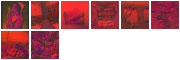

In [17]:
itorch.image(torch.cat(y_images,uv_op,2))

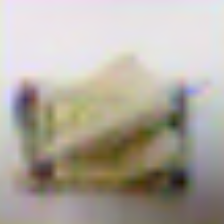

In [27]:
itorch.image(image.scale(image.yuv2rgb(torch.cat(y_images[3],uv_op[3],1)),224,224))

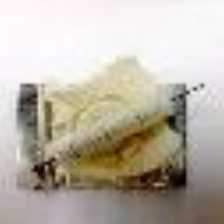

In [28]:
itorch.image(image.scale(im_batch[3],224,224))

In [21]:
function create_hypercolumn_dataset_random_bw(num_images, layer_nums)
    local max_count = num_images;
    im_batch = get_image_batch(num_images)
    
    local count = 1;
    y_temp = image.rgb2y(im_batch[count])
    print(y_temp:size())
    im_y = torch.cat(y_temp,y_temp,1);
    im_y = torch.cat(im_y,y_temp,1);
    print(im_y:size())
    local hc_batch = nil;
    local hc_temp = get_VGG_hypercolumns(im_y,VGG_net,layer_nums)
    hc_size = hc_temp:size();
    hc_batch = hc_temp:reshape(1,hc_size[1], hc_size[2], hc_size[3] );
    
--     for count=2,num_images do
        
--         y_temp = image.rgb2y(im_batch[count])
--         im_y = torch.cat(y_temp.y_temp,1);
--         im_y = torch.cat(im_y,y_temp,1);
        
--         hc_temp = get_VGG_hypercolumns(im_y,VGG_net,layer_nums)
--         hc_temp = hc_temp:reshape(1,hc_size[1], hc_size[2], hc_size[3] );
--         hc_batch = torch.cat(hc_batch, hc_temp,1)
--     end
    return im_batch,hc_batch
    
end


In [22]:
local layer_nums = {3,9}
local num_images = 8;
val_im_batch,val_hc_batch = create_hypercolumn_dataset_random_bw(num_images, layer_nums)
-- val_im_batch,val_hc_batch = create_hypercolumn_dataset_random(num_images, layer_nums);
hc_size = val_hc_batch:size()
num_hypercolumns = hc_size[2]
uv_images,y_images = create_yuv_images(val_im_batch,28,28)
net:forward(val_hc_batch);
val_uv = net.output -0.5;

inconsistent tensor sizes at /home/kedart/torch/pkg/torch/lib/TH/generic/THTensorMath.c:1937
stack traceback:
	[C]: at 0x7fc328f99ca0
	[C]: in function 'cat'
	./Utils.lua:112: in function 'get_image_batch'
	[string "function create_hypercolumn_dataset_random_bw..."]:3: in function 'create_hypercolumn_dataset_random_bw'
	[string "local layer_nums = {3,9}..."]:3: in main chunk
	[C]: in function 'xpcall'
	/home/kedart/torch/install/share/lua/5.1/itorch/main.lua:209: in function </home/kedart/torch/install/share/lua/5.1/itorch/main.lua:173>
	/home/kedart/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/home/kedart/torch/install/share/lua/5.1/itorch/main.lua:381: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

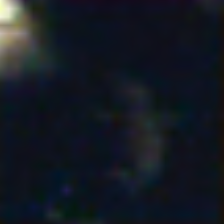

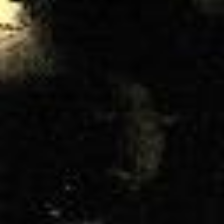

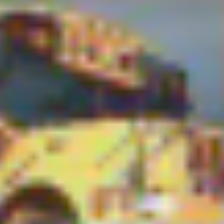

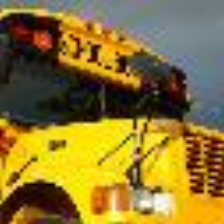

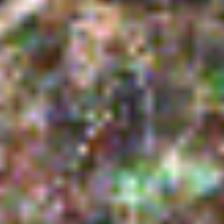

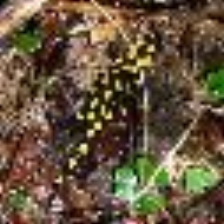

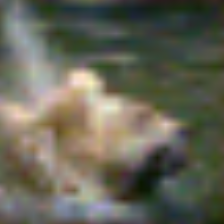

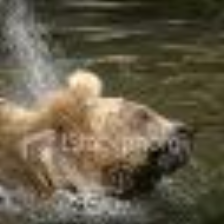

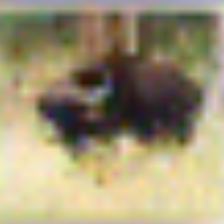

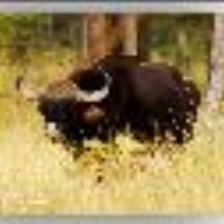

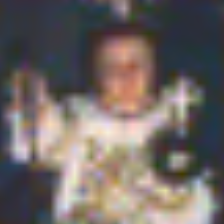

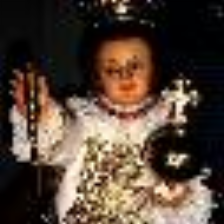

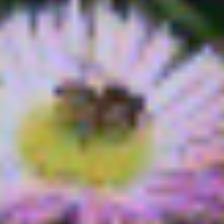

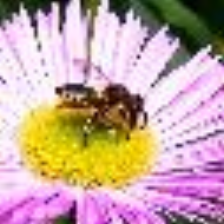

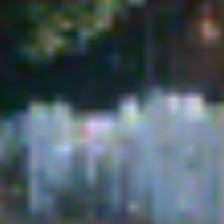

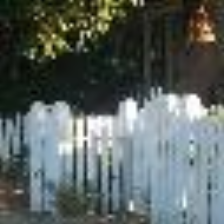

In [36]:
local num_images = 8;
for iter=1,num_images do
    itorch.image(image.scale(image.yuv2rgb(torch.cat(y_images[iter],val_uv[iter],1)),224,224))
    itorch.image(image.scale(im_batch[iter],224,224))
end